In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import seaborn as sns
import momepy

/home/twenty/miniconda3/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
df = gpd.read_file('data/india/overpass/export.geojson')

In [3]:
#https://networkx.org/documentation/latest/auto_examples/geospatial/plot_lines.html#sphx-glr-auto-examples-geospatial-plot-lines-py
G = momepy.gdf_to_nx(df, approach="primal")

/home/twenty/miniconda3/lib/python3.9/site-packages/momepy/utils.py:235: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_network[length] = gdf_network.geometry.length


In [4]:
# node closeness centrality
node_centrality = nx.closeness_centrality(G)

In [5]:
df1 = pd.DataFrame(data=pd.Series(node_centrality), columns=['cc'])
df1['colors'] = ox.plot.get_colors(n=len(df1), cmap='inferno', start=0.2)
df1.reset_index(inplace=True)
df1.rename(columns={'level_0': 'x', 'level_1': 'y'}, inplace=True)
df1

,x,y,cc,colors
0,77.231616,28.670095,0.002662,"(0.258234, 0.038571, 0.406485, 1.0)"
1,77.229351,28.679178,0.002662,"(0.258234, 0.038571, 0.406485, 1.0)"
2,77.148779,28.596662,0.001256,"(0.258234, 0.038571, 0.406485, 1.0)"
3,77.125499,28.605758,0.001265,"(0.258234, 0.038571, 0.406485, 1.0)"
4,77.422474,28.665959,0.001911,"(0.258234, 0.038571, 0.406485, 1.0)"
...,...,...,...,...
3492,76.925160,28.686272,0.000286,"(0.988362, 0.998364, 0.644924, 1.0)"
3493,76.919941,28.684413,0.001220,"(0.988362, 0.998364, 0.644924, 1.0)"
3494,76.917939,28.683770,0.001308,"(0.988362, 0.998364, 0.644924, 1.0)"
3495,76.898422,28.677327,0.000286,"(0.988362, 0.998364, 0.644924, 1.0)"


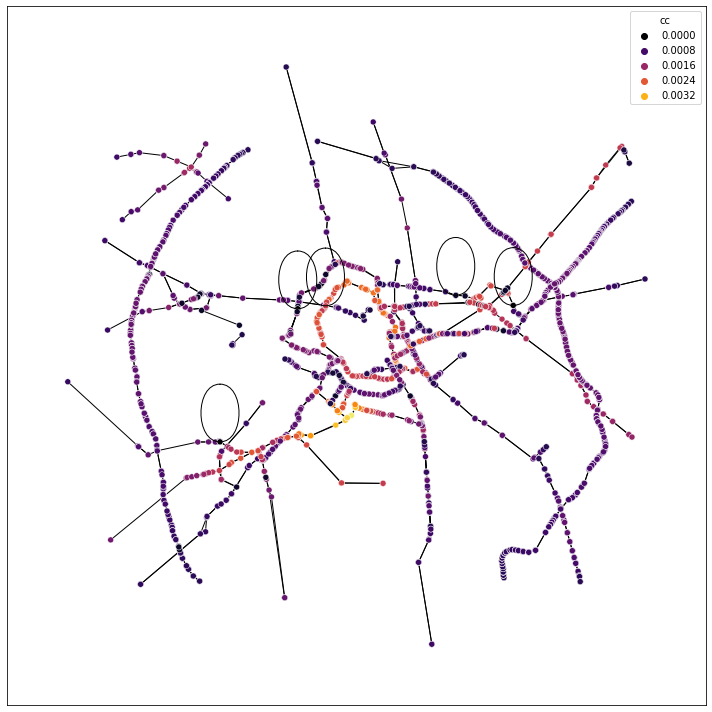

In [9]:
_, ax = plt.subplots(figsize=(10, 10))
nx.draw_networkx_edges(G, pos={(row.x, row.y): (row.x, row.y) for _, row in df1.iterrows()}, ax=ax)
sns.scatterplot(x=df1.x, y=df1.y, hue=df1.cc, palette='inferno', ax=ax)
plt.tight_layout()
plt.savefig('cc.png')